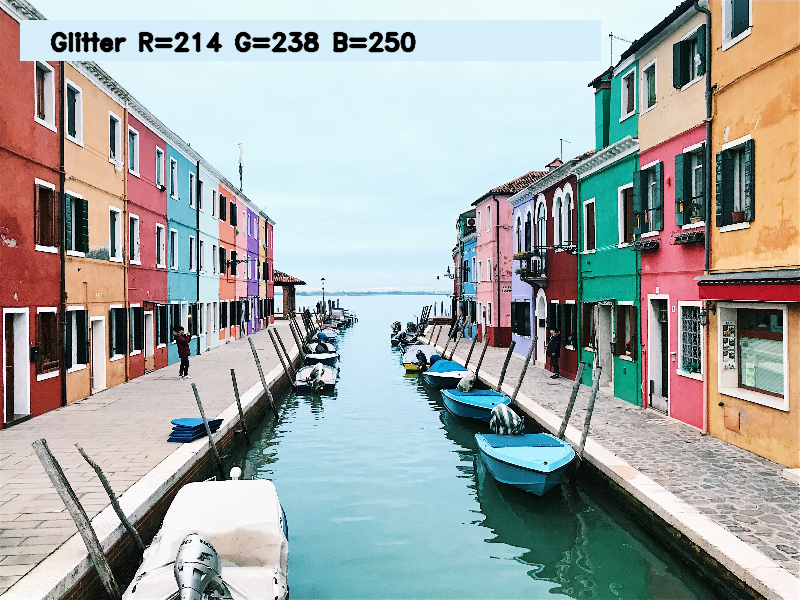

In [3]:
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab compatibility

# --------------------------------------------------------------------------

img_path = '/content/pic3.jpg'
csv_path = '/content/colors.csv'

# reading csv file
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=index, header=None)

# reading image
img = cv2.imread(img_path)
img = cv2.resize(img, (800,600))

#declaring global variables (though 'clicked' is not needed for the simulated click)
clicked = False
r = g = b = xpos = ypos = 0

#function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R,G,B):
	minimum = 1000
	for i in range(len(df)):
		d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B']))
		if d <= minimum:
			minimum = d
			cname = df.loc[i, 'color_name']

	return cname

# The original draw_function for interactive clicks is not directly applicable in Colab's non-GUI environment.
# Instead, we will simulate a click.
# def draw_function(event, x, y, flags, params):
# 	if event == cv2.EVENT_LBUTTONDBLCLK:
# 		global b, g, r, xpos, ypos, clicked
# 		clicked = True
# 		xpos = x
# 		ypos = y
# 		b,g,r = img[y,x]
# 		b = int(b)
# 		g = int(g)
# 		r = int(r)

# Simulate a double-click at the center of the image
# Image was resized to (800, 600), so center is (400, 300)
simulated_x = 400
simulated_y = 300

# Get color at simulated point
b, g, r = img[simulated_y, simulated_x]
b = int(b)
g = int(g)
r = int(r)

# Draw rectangle to display the color
cv2.rectangle(img, (20,20), (600,60), (b,g,r), -1)

# Create text string to display (Color name and RGB values)
text = get_color_name(r,g,b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

# Put text on the image
cv2.putText(img, text, (50,50), 2,0.8, (255,255,255),2,cv2.LINE_AA)

# For very light colours, display text in black
if r+g+b >=600:
	cv2.putText(img, text, (50,50), 2,0.8, (0,0,0),2,cv2.LINE_AA)

# Display the final image using cv2_imshow
cv2_imshow(img)
